Importing tensorflow

In [1]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


Importing keras, layers and dataset

In [2]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

Splitting test and train datasets

In [8]:
(x_train,y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape)
#we have 60000 datasets of 28 * 28 images
#normalising the data
x_train = x_train.reshape([-1, 28, 28]).astype("float32") / 255.0
x_test = x_test.reshape([-1, 28, 28]).astype("float32") / 255.0

(60000, 28, 28)


Building model LSTM (using sequential)

In [9]:
model = keras.Sequential()
model.add(keras.Input(shape=(None, 28)))
model.add(layers.LSTM(256, return_sequences=True, activation="relu"))
model.add(layers.LSTM(256))
model.add(layers.Dense(10))

print(model.summary())

model.compile(
    loss = keras.losses.SparseCategoricalCrossentropy(from_logits = True),
    optimizer = keras.optimizers.Adam(learning_rate = 0.003),
    metrics = ["accuracy"],
)

model.fit(x_train, y_train, batch_size = 64, epochs = 10, verbose = 2)
model.evaluate(x_test, y_test, batch_size = 64, verbose = 2)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, None, 256)         291840    
                                                                 
 lstm_7 (LSTM)               (None, 256)               525312    
                                                                 
 dense_4 (Dense)             (None, 10)                2570      
                                                                 
Total params: 819,722
Trainable params: 819,722
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
938/938 - 90s - loss: 0.2631 - accuracy: 0.9163 - 90s/epoch - 96ms/step
Epoch 2/10
938/938 - 46s - loss: 0.0754 - accuracy: 0.9781 - 46s/epoch - 49ms/step
Epoch 3/10
938/938 - 46s - loss: 0.0540 - accuracy: 0.9834 - 46s/epoch - 49ms/step
Epoch 4/10
938/938 - 45s - loss: 0.0428 - accuracy: 0.9863

[0.03508976846933365, 0.9907000064849854]

Testing it on some random image number (code used from previous assignments)

7
Original label is 7 and predicted label is 7


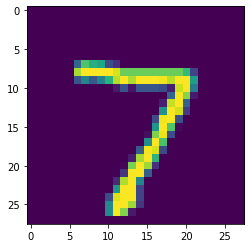

In [12]:
import matplotlib.pyplot as plt
import numpy as np
labels = '''0 1 2 3 4 5 6 7 8 9'''.split()
image_number = 0
plt.imshow(x_test[image_number])
n = np.array(x_test[image_number])
p = n.reshape(1, 28, 28, 1)
print(model.predict(p).argmax())
predicted_label = labels[model.predict(p).argmax()]
original_label = labels[y_test[image_number]]
print("Original label is {} and predicted label is {}".format(
    original_label, predicted_label))

0
Original label is 0 and predicted label is 0


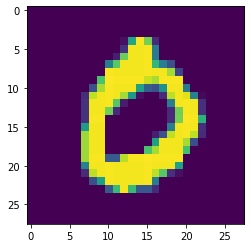

In [13]:
image_number = 3
plt.imshow(x_test[image_number])
n = np.array(x_test[image_number])
p = n.reshape(1, 28, 28, 1)
print(model.predict(p).argmax())
predicted_label = labels[model.predict(p).argmax()]
original_label = labels[y_test[image_number]]
print("Original label is {} and predicted label is {}".format(
    original_label, predicted_label))